In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

We are using MNIST dataset
The dataset object returns the data in the form of Python Imagine Library (PIL) images, which we convert to tensors by passing a transform=ToTensor() parameter.

In [6]:
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST('./data/', download=True, train=True, transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data/', download=True, train=False, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#### Visualizing the dataset

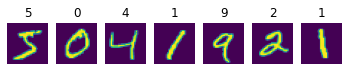

In [7]:
fig, ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

In [27]:
data_train[3]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

#### Dataset Structure

We have a total of 6000 training images and 1000 testing images. Its important to split out the data for training and testing. We also want to do some data exploration to get a better idea of what our data looks like

Each sample is a tuple in the following structure:

* First element is the actual image of a digit, represented by a tensor of shape 1x28x28
* Second element is a label that specifies which digit is represented by the tensor. It is a tensor that contains a number from 0 to 9.

data_train is a training dataset that we will use to train our model on. data_test is a smaller test dataset that we can use to verify our model.

In [28]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:',data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


All pixel intensities of the images are represented by floating-point values in between 0 and 1:

In [29]:
print('Min intensity value: ',data_train[0][0].min().item())
print('Max intensity value: ',data_train[0][0].max().item())

Min intensity value:  0.0
Max intensity value:  1.0


#### Loading your own images

When using your own images, you need to load them as PyTorch tensors
You can use image manipulation libraries such as OpenCV, or PIL/Pillow.Once you load the image as numpy arrays, you can easily convert them as tensors.

Before passing the image to neural network, all the pixel intensity values should be scaled between 0 and 1. All the weight initializations in neural network are designed to work with this range.

ToTensor automatically scales PIL/numpy images with integer pixel values into 0..1 range.

It is important to note that all images should be scaled to the same size. If your original images have different aspect ratios, you need to decide how to handle this scaling - either by cropping images, or by padding extra space.

#### Training a dense neural network

For each input image, we need to specify which class it belongs to.
We will start with the simplest possible approach - a fully-connected neural network (which is also called a perceptron). 

We will recap the way neural networks are defined in PyTorch, and how the training algorithm works. 

In [30]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2022-07-18 15:13:24--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: 'pytorchcv.py'

pytorchcv.py        100%[===================>]   6.22K  --.-KB/s    in 0s      

2022-07-18 15:13:25 (13.0 MB/s) - 'pytorchcv.py' saved [6371/6371]



In [33]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary

from pytorchcv import load_mnist, plot_results
load_mnist()

#### Fully connected dense neural network

A basic neural network in PyTorch consists of a number of layers. The simplest network would include just one fully-connected layer, which is called Linear layer, with 784 inputs (one input for each pixel of the input image) and 10 outputs (one output for each class).

![fcnn](img1.png)

As we discussed above, the dimension of our digit images is 1×28×28, i.e. each image contains 28×28=784 different pixels. Because linear layer expects its input as one-dimensional vector, we need to insert another layer into the network, called Flatten, to change input tensor shape from  1×28×28 to 784.

After Flatten, there is a main linear layer (called Dense in PyTorch terminology) that converts 784 inputs to 10 outputs - one per class. We want n-th output of the network to return the probability of the input digit being equal to n.

Because the output of a fully-connected layer is not normalized to be between 0 and 1, it cannot be thought of as probability. Moreover, if want outputs to be probabilities of different digits, they all need to add up to 1. To turn output vectors into probability vector, a function called Softmax is often used as the last activation function in a classification neural network. For example, softmax([−1,1,2])=[0.035,0.25,0.705].

It can be defined in PyTorch in the following way, using Sequential syntax:

In [34]:
net = nn.Sequential(
         nn.Flatten(),
         nn.Linear(784,10), # 784 inputs and 10 outputs
         nn.LogSoftmax())

In [35]:
net

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): LogSoftmax(dim=None)
)

Expected output is compared with the actual output of our network using loss function, that gives one number - loss - as an output. Our goal during network training is to minimize this loss by adjusting model parameters - layer weights.

#### Training the network

A network defined in this way can take any digit as input and produce a vector of probabilities as an output.

In [36]:
print('Digit to be predicted:', data_train[0][1])
torch.exp(net(data_train[0][0]))

Digit to be predicted: 5


/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[0.1169, 0.1374, 0.0769, 0.0795, 0.0943, 0.0744, 0.0690, 0.0926, 0.1360,
         0.1232]], grad_fn=<ExpBackward0>)

Because we use LogSoftmax as final activation of our network, we pass network output through torch.exp to get probabilities.

As you can see the network predicts similar probabilities for each digit. This is because it has not been trained on how to recognize the digits. We need to give it our training data to train it on our dataset.

To train the model we will need to create batches from our dataset of a certain size, let's say 64. PyTorch has an object called DataLoader that can create batches of our data for us automatically:

In [38]:
train_loader = torch.utils.data.DataLoader(data_train,batch_size=64)
test_loader = torch.utils.data.DataLoader(data_test,batch_size=64)

In [39]:
def train_epoch(net,dataloader,lr=0.01,optimizer=None,loss_fn = nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    net.train()
    total_loss,acc,count = 0,0,0
    for features,labels in dataloader:
        optimizer.zero_grad()
        out = net(features)
        loss = loss_fn(out,labels) #cross_entropy(out,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==labels).sum()
        count+=len(labels)
    return total_loss.item()/count, acc.item()/count

In [40]:
train_epoch(net,train_loader)

/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(0.005925243631998698, 0.89315)

In [41]:
def validate(net, dataloader, loss_fn=nn.NLLLoss()):
    net.eval()
    count, acc, loss = 0, 0, 0
    with torch.no_grad():
        for features, labels in dataloader:
            out = net(features)
            loss += loss_fn(out, labels)
            pred = torch.max(out,1)[1]
            acc += (pred==labels).sum()
            count += len(labels)
    return loss.item()/count, acc.item()/count

validate(net, test_loader)

/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


(0.00586680793762207, 0.8932)

In [43]:
def train(net,train_loader,test_loader,optimizer=None,lr=0.01,epochs=10,loss_fn=nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for ep in range(epochs):
        tl,ta = train_epoch(net,train_loader,optimizer=optimizer,lr=lr,loss_fn=loss_fn)
        vl,va = validate(net,test_loader,loss_fn=loss_fn)
        print(f"Epoch {ep:2}, Train acc={ta:.3f}, Val acc={va:.3f}, Train loss={tl:.3f}, Val loss={vl:.3f}")
        res['train_loss'].append(tl)
        res['train_acc'].append(ta)
        res['val_loss'].append(vl)
        res['val_acc'].append(va)
    return res

#### Overfitting

In [44]:
# Re-initialize the network to start from scratch
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,10), # 784 inputs, 10 outputs
        nn.LogSoftmax())

hist = train(net,train_loader,test_loader,epochs=5)

Epoch  0, Train acc=0.893, Val acc=0.894, Train loss=0.006, Val loss=0.006
Epoch  1, Train acc=0.910, Val acc=0.899, Train loss=0.005, Val loss=0.006
Epoch  2, Train acc=0.913, Val acc=0.898, Train loss=0.005, Val loss=0.006
Epoch  3, Train acc=0.915, Val acc=0.897, Train loss=0.005, Val loss=0.006
Epoch  4, Train acc=0.916, Val acc=0.897, Train loss=0.005, Val loss=0.006


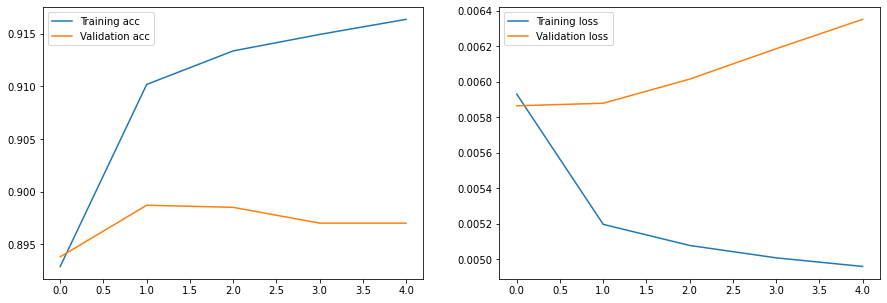

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(hist['train_acc'], label='Training acc')
plt.plot(hist['val_acc'], label='Validation acc')
plt.legend()
plt.subplot(122)
plt.plot(hist['train_loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.legend()

* The diagram on the left shows the training accuracy increasing (which corresponds to the network learning to classify our training data better and better), while validation accuracy starts to fall. 
* The diagram on the right show the training loss and validation loss, you can see the training loss decreasing (meaning its performing better) and the validation loss increasing (meaning its performing worse). 
* These graphs would indicate the model is overfitted.

#### Visualizing network weights

The Dense layer in our network is also called linear, because it performs linear transformation of its input, which can be defined as y=Wx+b, where  W is a matrix of weights, and  b is bias. Weights matrix  W is in fact responsible for what our network can do, i.e. for recognizing digits. In our case, it has size of  784×10 , because it produces 10 outputs (one output per digit) for an input image.


Lets visualize our weights of our neural network and see what they look like. When the network is more complex than just one layer it can be a difficult to visualize the results like this, because in complex network weights do not make much sense when visualized. However, in our case each of 10 dimensions of weight matrix  W correspond to individual digits, and thus can be visualized to see how the digit recognition takes place. For example, if we want to see if our number is 0 or not, we will multiply input digit by  W[0] and pass the result through a softmax normalization to get the answer. 

In the code below, we will first get the matrix W into weight_tensor variable. It can be obtained by calling the net.parameters() method (which returns both  W and b), and then calling next to get the first of two parameters. Then we will go over each dimension, reshape it to 28×28size, and plot. You can see that 10 weight tensor dimensions somewhat resemble the average shape of the digits they classify:

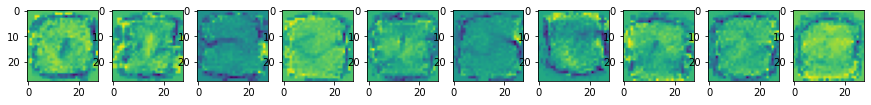

In [46]:
weight_tensor = next(net.parameters())
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i,x in enumerate(weight_tensor):
    ax[i].imshow(x.view(28,28).detach())

#### Multi-layered perceptron

To further increase accuracy, we may want to include one or more hidden layers.
It is important to introduce those non-linear activation functions, because they are one of the reasons neural networks achieve high expressive power. Indeed, it can be demonstrated mathematically that if a network consisted just of a series of linear layers, it would essentially be equivalent to one linear layer. Thus inserting non-linear functions in between layers is important!

In [51]:
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,100),     # 784 inputs, 100 outputs
        nn.ReLU(),              # Activation Function
        nn.Linear(100,10),      # 100 inputs, 10 outputs
        nn.LogSoftmax(dim=0))

summary(net,input_size=(1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─ReLU: 1-3                              [1, 100]                  --
├─Linear: 1-4                            [1, 10]                   1,010
├─LogSoftmax: 1-5                        [1, 10]                   --
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Here we use summary() function to display a detailed layer-by-layer structure of a network with some other useful information. In particular, we can see:
Layer-by-layer structure of a network, and output size of each layer
Number of parameters of each layer, as well as for the whole network. The more parameters the network has, the more data samples it needs to be trained on without overfitting.
Lets see how the number of parameters is calculated. First linear layer has 784 inputs and 100 outputs. The layer is defined by  
W1 × x +b1, where  W1 has size  784×100, and  b1 = 100. Thus total number of parameters for this layer is  
784×100+100=78500. Similarly, number of parameters for the second layer is  100×10+10=1010. Activation functions, as well as Flatten layers do not have parameters.
There is another syntax that we can use to define the same network by using classes:

In [52]:
from torch.nn.functional import relu, log_softmax

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(784,100)
        self.out = nn.Linear(100,10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = relu(x)
        x = self.out(x)
        x = log_softmax(x,dim=0)
        return x

net = MyNet()

summary(net,input_size=(1,28,28),device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
MyNet                                    [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─Linear: 1-3                            [1, 10]                   1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Epoch  0, Train acc=0.928, Val acc=0.952, Train loss=0.035, Val loss=0.033
Epoch  1, Train acc=0.952, Val acc=0.954, Train loss=0.033, Val loss=0.033
Epoch  2, Train acc=0.957, Val acc=0.957, Train loss=0.033, Val loss=0.033
Epoch  3, Train acc=0.960, Val acc=0.955, Train loss=0.033, Val loss=0.033
Epoch  4, Train acc=0.962, Val acc=0.959, Train loss=0.033, Val loss=0.033


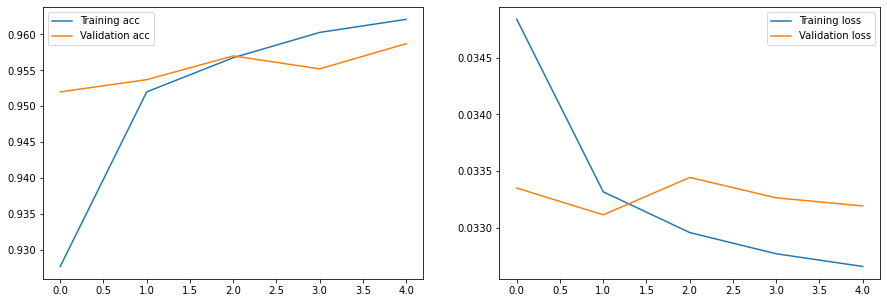

In [53]:
hist = train(net,train_loader,test_loader,epochs=5)
plot_results(hist)

#### Takeaway

Training a neural network in PyTorch can be programmed with a training loop. It may seem like a complicated process, but in real life we need to write it once, and we can then re-use this training code later without changing it.

We can see that a single-layer and multi-layer dense neural networks show relatively good performance, but if we try to apply them to real-world images, the accuracy will not be too high. In the next unit, we will introduce the concept of convolutions, which allow us to get much better performance for image recognition.

#### Convolutional neural networks

Computer vision is different from generic classification, because when we are trying to find a certain object in the picture, we are scanning the image looking for some specific patterns and their combinations. For example, when looking for a cat, we first may look for horizontal lines, which can form whiskers, and then certain combination of whiskers can tell us that it is actually a picture of a cat. Relative position and presence of certain patterns is important, and not their exact position on the image.

To extract patterns, we will use the notion of convolutional filters. 

In [54]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2022-07-23 12:48:44--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: 'pytorchcv.py.1'

pytorchcv.py.1      100%[===================>]   6.22K  --.-KB/s    in 0.001s  

2022-07-23 12:48:44 (8.59 MB/s) - 'pytorchcv.py.1' saved [6371/6371]



In [55]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np

from pytorchcv import load_mnist, train, plot_results, plot_convolution, display_dataset
load_mnist(batch_size=128)

Convolutional filters are small windows that run over each pixel of the image and compute weighted average of the neighbouring pixel.

They are defined by matrices of weight coefficients.

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


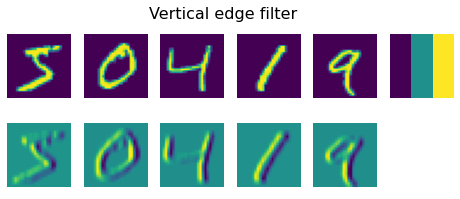

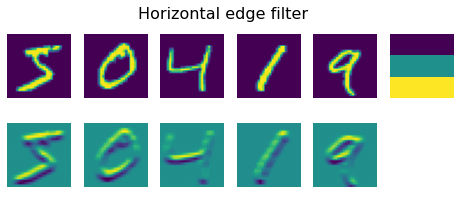

In [56]:
plot_convolution(torch.tensor([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]]),'Vertical edge filter')
plot_convolution(torch.tensor([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]]),'Horizontal edge filter')

The first filter is called a vertical edge filter and is defined by the matrix

(-1 0 1
 -1 0 1
 -1 0 1)
 
When this filter goes over relatively uniform pixel field, all values add up to 0. However, when it encounters a vertical edge in the image, high spike value is generated. That's why in the images above you can see vertical edges represented by high and low values, while horizontal edges are averaged out.
An opposite thing happens when we apply horizontal edge filter - horizontal lines are amplified, and vertical are averaged out.

If we apply 3×3 filter to an image of size 
28×28 - the size of the image will become 26×26, because the filter does not go over the image boundaries. In some cases, however, we may want to keep the size of the image the same, in which case image is padded with zeros on each side.

In classical computer vision, multiple filters were applied to the image to generate features, which then were used by machine learning algorithm to build a classifier. However, in deep learning we construct networks that learn best convolutional filters to solve classification problem.
To do that, we introduce convolutional layers.

#### Convolutional Layers

Convolutional layers are defined using nn.Conv2d construction. We need to specify the following:

* in_channels - number of input channels. In our case we are dealing with a grayscale image, thus number of input channels is 1. Color image has 3 channels (RGB).
* out_channels - number of filters to use. We will use 9 different filters, which will give the network plenty of opportunities to explore which filters work best for our scenario.
* kernel_size is the size of the sliding window. Usually 3x3 or 5x5 filters are used. The choice of filter size is usually chosen by experiment, that is by trying out different filter sizes and comparing resulting accuracy.

Simplest CNN will contain one convolutional layer. Given the input size 28x28, after applying nine 5x5 filters we will end up with a tensor of 9x24x24 (the spatial size is smaller, because there are only 24 positions where a sliding interval of length 5 can fit into 28 pixels). Here the result of each filter is represented by a different channel in the image (thus the first dimension 9 corresponds to the number of filters).
After convolution, we flatten 9x24x24 tensor into one vector of size 5184, and then add linear layer, to produce 10 classes. We also use relu activation function in between layers.

In [57]:
class OneConv(nn.Module):
    def __init__(self):
        super(OneConv, self).__init__()
        self.conv = nn.Conv2d(in_channels=1,out_channels=9,kernel_size=(5,5))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(5184,10)

    def forward(self, x):
        x = nn.functional.relu(self.conv(x))
        x = self.flatten(x)
        x = nn.functional.log_softmax(self.fc(x),dim=1)
        return x

net = OneConv()

summary(net,input_size=(1,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
OneConv                                  [1, 10]                   --
├─Conv2d: 1-1                            [1, 9, 24, 24]            234
├─Flatten: 1-2                           [1, 5184]                 --
├─Linear: 1-3                            [1, 10]                   51,850
Total params: 52,084
Trainable params: 52,084
Non-trainable params: 0
Total mult-adds (M): 0.19
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.21
Estimated Total Size (MB): 0.25

You can see that this network contains around 50k trainable parameters, compared to around 80k in fully-connected multi-layered networks. This allows us to achieve good results even on smaller datasets, because convolutional networks generalize much better.

Note that the number of parameters of convolutional layer is quite small, and it does not depend on the resolution of the image! In our case, we were using 9 filters of dimension 5×5, thus the number of parameters is 9×5×5+9=234. 

Even though we missed this in our discussion above, but convolutional filter also has bias. Most of the parameters of our network comes from the final Dense layer.

Epoch  0, Train acc=0.952, Val acc=0.961, Train loss=0.003, Val loss=0.002
Epoch  1, Train acc=0.975, Val acc=0.964, Train loss=0.001, Val loss=0.002
Epoch  2, Train acc=0.981, Val acc=0.970, Train loss=0.001, Val loss=0.002
Epoch  3, Train acc=0.984, Val acc=0.970, Train loss=0.001, Val loss=0.002
Epoch  4, Train acc=0.986, Val acc=0.970, Train loss=0.001, Val loss=0.002


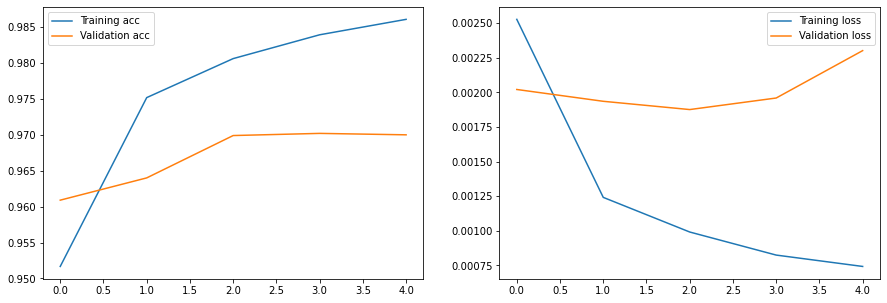

In [58]:
hist = train(net,train_loader,test_loader,epochs=5)
plot_results(hist)

#### Train multi-layer convolutional neural network

#### Multi-layered CNN

In the previous unit we have learned about convolutional filters that can extract patterns from images. For our MNIST classifier we used 9 5x5 filters, resulting in 9x24x24 tensor.

We can use the same idea of convolution to extract higher-level patterns in the image. For example, rounded edges of digits such as 8 and 9 can be composed from a number of smaller strokes. To recognize those patterns, we can build another layer of convolution filters on top of the result of the first layer.

In [59]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2022-07-23 14:39:52--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: 'pytorchcv.py.2'

pytorchcv.py.2      100%[===================>]   6.22K  --.-KB/s    in 0.001s  

2022-07-23 14:39:52 (8.45 MB/s) - 'pytorchcv.py.2' saved [6371/6371]



In [60]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np

from pytorchcv import load_mnist, train, plot_results, plot_convolution, display_dataset
load_mnist(batch_size=128)

#### Pooling layers

First convolutional layers looks for primitive patterns, such as horizontal or vertical lines. Next level of convolutional layers on top of them look for higher-level patterns, such as primitive shapes. More convolutional layers can combine those shapes into some parts of the picture, up to the final object that we are trying to classify. This creates a hierarchy of extracted patterns.

When doing so, we also need to apply one trick: reducing the spatial size of the image. Once we have detected there is a horizontal stoke within a sliding window, it is not so important at which exact pixel it occurred. Thus we can "scale down" the size of the image, which is done using one of the pooling layers:

* Average Pooling takes a sliding window (for example, 2x2 pixels) and computes an average of values within the window
* Max Pooling replaces the window with the maximum value. The idea behind max pooling is to detect a presence of a certain pattern within the sliding window.

Thus, in a typical CNN there would be composed of several convolutional layers, with pooling layers in between them to decrease dimensions of the image. We would also increase the number of filters, because as patterns become more advanced - there are more possible interesting combinations that we need to be looking for.

Because of decreasing spatial dimensions and increasing feature/filters dimensions, this architecture is also called pyramid architecture.

In [62]:
class MultiLayerCNN(nn.Module):
    def __init__(self):
        super(MultiLayerCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc = nn.Linear(320,10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 320)
        x = nn.functional.log_softmax(self.fc(x),dim=1)
        return x

net = MultiLayerCNN()
summary(net,input_size=(1,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
MultiLayerCNN                            [1, 10]                   --
├─Conv2d: 1-1                            [1, 10, 24, 24]           260
├─MaxPool2d: 1-2                         [1, 10, 12, 12]           --
├─Conv2d: 1-3                            [1, 20, 8, 8]             5,020
├─MaxPool2d: 1-4                         [1, 20, 4, 4]             --
├─Linear: 1-5                            [1, 10]                   3,210
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
Total mult-adds (M): 0.47
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.03
Estimated Total Size (MB): 0.09

In [63]:
hist = train(net,train_loader,test_loader,epochs=5)

Epoch  0, Train acc=0.955, Val acc=0.979, Train loss=0.002, Val loss=0.001
Epoch  1, Train acc=0.978, Val acc=0.970, Train loss=0.001, Val loss=0.002
Epoch  2, Train acc=0.982, Val acc=0.976, Train loss=0.001, Val loss=0.001
Epoch  3, Train acc=0.983, Val acc=0.985, Train loss=0.001, Val loss=0.001
Epoch  4, Train acc=0.982, Val acc=0.981, Train loss=0.001, Val loss=0.001


#### CIFAR-10 Dataset

In [64]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=14, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=14, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [65]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16,120,5)
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(120,64)
        self.fc2 = nn.Linear(64,10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = nn.functional.relu(self.conv3(x))
        x = self.flat(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = LeNet()

summary(net,input_size=(1,3,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
LeNet                                    [1, 10]                   --
├─Conv2d: 1-1                            [1, 6, 28, 28]            456
├─MaxPool2d: 1-2                         [1, 6, 14, 14]            --
├─Conv2d: 1-3                            [1, 16, 10, 10]           2,416
├─MaxPool2d: 1-4                         [1, 16, 5, 5]             --
├─Conv2d: 1-5                            [1, 120, 1, 1]            48,120
├─Flatten: 1-6                           [1, 120]                  --
├─Linear: 1-7                            [1, 64]                   7,744
├─Linear: 1-8                            [1, 10]                   650
Total params: 59,386
Trainable params: 59,386
Non-trainable params: 0
Total mult-adds (M): 0.66
Input size (MB): 0.01
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.30

In order to achieve better training results, we may need to experiment with some training parameters, such as learning rate. Thus, we explicitly define a stochastic gradient descent (SGD) optimizer here, and pass training parameters. You can adjust those parameters and observe how they affect training.

In [66]:
opt = torch.optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
hist = train(net, trainloader, testloader, epochs=3, optimizer=opt, loss_fn=nn.CrossEntropyLoss())

Epoch  0, Train acc=0.243, Val acc=0.382, Train loss=0.147, Val loss=0.121
Epoch  1, Train acc=0.428, Val acc=0.466, Train loss=0.112, Val loss=0.105
Epoch  2, Train acc=0.491, Val acc=0.514, Train loss=0.100, Val loss=0.096


### Use a pre-trained network with transfer learning

In [67]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2022-07-25 14:02:02--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: 'pytorchcv.py.3'

pytorchcv.py.3      100%[===================>]   6.22K  --.-KB/s    in 0.001s  

2022-07-25 14:02:03 (11.2 MB/s) - 'pytorchcv.py.3' saved [6371/6371]



In [68]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
import os

from pytorchcv import train, plot_results, display_dataset, train_long, check_image_dir

#### Cat Vs. Dog Dataset

In [83]:
check_image_dir('data_v1/kagglecatsanddogs_5340/PetImages/Cat/*.jpg')
check_image_dir('data_v1/kagglecatsanddogs_5340/PetImages/Dog/*.jpg')

Corrupt image: data_v1/kagglecatsanddogs_5340/PetImages/Cat/666.jpg


/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Corrupt image: data_v1/kagglecatsanddogs_5340/PetImages/Dog/11702.jpg


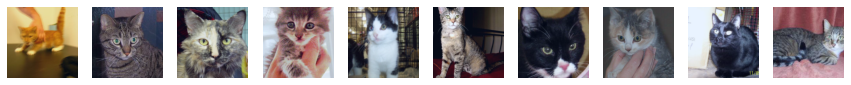

In [84]:
std_normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
trans = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(), 
        std_normalize])
dataset = torchvision.datasets.ImageFolder('data_v1/kagglecatsanddogs_5340/PetImages',transform=trans)
trainset, testset = torch.utils.data.random_split(dataset,[20000,len(dataset)-20000])

display_dataset(dataset)

#### Pre-trained models

There are many different pre-trained models available inside torchvision module, and even more models can be found on the Internet. Let's see how simplest VGG-16 model can be loaded and used:

In [85]:
vgg = torchvision.models.vgg16(pretrained=True)
sample_image = dataset[0][0].unsqueeze(0)
res = vgg(sample_image)
print(res[0].argmax())

/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/ssteni/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

tensor(281)


In [90]:
# import json, requests
# class_map = json.loads(requests.get("https://mslearntensorflowlp.blob.core.windows.net/metadata/imagenet_class_index.json").text)
# class_map = { int(k) : v for k,v in class_map.items() }

# class_map[res[0].argmax().item()]

In [89]:
summary(vgg,input_size=(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In addition to the layer we already know, there is also another layer type called Dropout. These layers act as regularization technique. Regularization makes slight modifications to the learning algorithm so the model generalizes better. During training, dropout layers discard some proportion (around 30%) of the neurons in the previous layer, and training happens without them. This helps to get the optimization process out of local minima, and to distribute decisive power between different neural paths, which improves overall stability of the network.

In [91]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Doing computations on device = {}'.format(device))

vgg.to(device)
sample_image = sample_image.to(device)

vgg(sample_image).argmax()

Doing computations on device = cpu


tensor(543)

#### Extracting VGG features

If we want to use VGG-16 to extract features from our images, we need the model without final classification layers. In fact, this "feature extractor" can be obtained using vgg.features method:

torch.Size([1, 512, 7, 7])


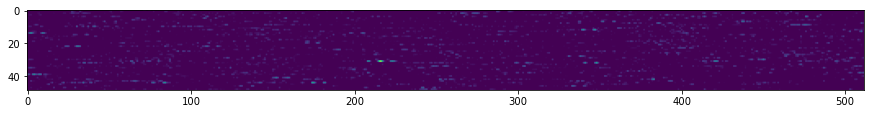

In [92]:
res = vgg.features(sample_image).cpu()
plt.figure(figsize=(15,3))
plt.imshow(res.detach().view(-1,512))
print(res.size())

The dimension of feature tensor is 512x7x7, but in order to visualize it we had to reshape it to 2D form.
Now let's try to see if those features can be used to classify images. Let's manually take some portion of images (800 in our case), and pre-compute their feature vectors. We will store the result in one big tensor called feature_tensor, and also labels into label_tensor:

In [93]:
bs = 8
dl = torch.utils.data.DataLoader(dataset,batch_size=bs,shuffle=True)
num = bs*100
feature_tensor = torch.zeros(num,512*7*7).to(device)
label_tensor = torch.zeros(num).to(device)
i = 0
for x,l in dl:
    with torch.no_grad():
        f = vgg.features(x.to(device))
        feature_tensor[i:i+bs] = f.view(bs,-1)
        label_tensor[i:i+bs] = l
        i+=bs
        print('.',end='')
        if i>=num:
            break


....................................................................................................

Now we can define vgg_dataset that takes data from this tensor, split it into training and test sets using random_split function, and train a small one-layer dense classifier network on top of extracted features:


In [94]:
vgg_dataset = torch.utils.data.TensorDataset(feature_tensor,label_tensor.to(torch.long))
train_ds, test_ds = torch.utils.data.random_split(vgg_dataset,[700,100])

train_loader = torch.utils.data.DataLoader(train_ds,batch_size=32)
test_loader = torch.utils.data.DataLoader(test_ds,batch_size=32)

net = torch.nn.Sequential(torch.nn.Linear(512*7*7,2),torch.nn.LogSoftmax()).to(device)

history = train(net,train_loader,test_loader)

Epoch  0, Train acc=0.891, Val acc=0.980, Train loss=0.087, Val loss=0.046
Epoch  1, Train acc=0.989, Val acc=0.970, Train loss=0.011, Val loss=0.038


/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch  2, Train acc=0.990, Val acc=0.980, Train loss=0.002, Val loss=0.051
Epoch  3, Train acc=0.999, Val acc=0.980, Train loss=0.000, Val loss=0.044
Epoch  4, Train acc=1.000, Val acc=0.980, Train loss=0.000, Val loss=0.045
Epoch  5, Train acc=1.000, Val acc=0.980, Train loss=0.000, Val loss=0.045
Epoch  6, Train acc=1.000, Val acc=0.980, Train loss=0.000, Val loss=0.045
Epoch  7, Train acc=1.000, Val acc=0.980, Train loss=0.000, Val loss=0.045
Epoch  8, Train acc=1.000, Val acc=0.980, Train loss=0.000, Val loss=0.045
Epoch  9, Train acc=1.000, Val acc=0.980, Train loss=0.000, Val loss=0.045


The result is great, we can distinguish between a cat and a dog with almost 98% probability! However, we have only tested this approach on a small subset of all images, because manual feature extraction seems to take a lot of time.

#### Transfer learning using one VGG network

In [95]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

To train the end-to-end model that will classify our dataset, we need to:

* replace the final classifier with the one that will produce required number of classes. In our case, we can use one Linear layer with 25088 inputs and 2 output neurons.

* freeze weights of convolutional feature extractor, so that they are not trained. It is recommended to initially do this freezing, because otherwise untrained classifier layer can destroy the original pre-trained weights of convolutional extractor. Freezing weights can be accomplished by setting requires_grad property of all parameters to False

In [96]:
vgg.classifier = torch.nn.Linear(25088,2).to(device)

for x in vgg.features.parameters():
    x.requires_grad = False

summary(vgg,(1, 3,244,244))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 2]                    --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 244, 244]         (1,792)
│    └─ReLU: 2-2                         [1, 64, 244, 244]         --
│    └─Conv2d: 2-3                       [1, 64, 244, 244]         (36,928)
│    └─ReLU: 2-4                         [1, 64, 244, 244]         --
│    └─MaxPool2d: 2-5                    [1, 64, 122, 122]         --
│    └─Conv2d: 2-6                       [1, 128, 122, 122]        (73,856)
│    └─ReLU: 2-7                         [1, 128, 122, 122]        --
│    └─Conv2d: 2-8                       [1, 128, 122, 122]        (147,584)
│    └─ReLU: 2-9                         [1, 128, 122, 122]        --
│    └─MaxPool2d: 2-10                   [1, 128, 61, 61]          --
│    └─Conv2d: 2-11                      [1, 256, 61, 61]    

As you can see from the summary, this model contain around 15 million total parameters, but only 50k of them are trainable - those are the weights of classification layer. That is good, because we are able to fine-tune smaller number of parameters with smaller number of examples.

In [97]:
trainset, testset = torch.utils.data.random_split(dataset,[20000,len(dataset)-20000])
train_loader = torch.utils.data.DataLoader(trainset,batch_size=16)
test_loader = torch.utils.data.DataLoader(testset,batch_size=16)

train_long(vgg,train_loader,test_loader,loss_fn=torch.nn.CrossEntropyLoss(),epochs=1,print_freq=90)

Epoch 0, minibatch 0: train acc = 0.5625, train loss = 0.04483048617839813
Epoch 0, minibatch 90: train acc = 0.9560439560439561, train loss = 0.10862557966630537
Epoch 0, minibatch 180: train acc = 0.9540745856353591, train loss = 0.15307871149389785
Epoch 0, minibatch 270: train acc = 0.959409594095941, train loss = 0.14856152692844068
Epoch 0, minibatch 360: train acc = 0.9617382271468145, train loss = 0.15864602086286467
Epoch 0, minibatch 450: train acc = 0.9642461197339246, train loss = 0.1553992294683689
Epoch 0, minibatch 540: train acc = 0.9663817005545287, train loss = 0.15318014881747488
Epoch 0, minibatch 630: train acc = 0.9671156893819335, train loss = 0.16918014308729942
Epoch 0, minibatch 720: train acc = 0.9692267683772539, train loss = 0.16074271870056236
Epoch 0, minibatch 810: train acc = 0.970098643649815, train loss = 0.16034405916451525
Epoch 0, minibatch 900: train acc = 0.9716981132075472, train loss = 0.1517292492662233
Epoch 0, minibatch 990: train acc = 0.97

/Users/ssteni/opt/anaconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 0 done, validation acc = 0.9771908763505402, validation loss = 0.15258355539481416


In [98]:
torch.save(vgg,'data_v1/kagglecatsanddogs_5340/cats_dogs.pth')

We can then load the model from file at any time. You may find it useful in case the next experiment destroys the model - you would not have to re-start from scratch.

In [100]:
vgg = torch.load('data_v1/kagglecatsanddogs_5340//cats_dogs.pth')

#### Fine-tuning transfer learning

In the previous section, we have trained the final classifier layer to classify images in our own dataset. However, we did not re-train the feature extractor, and our model relied on the features that the model has learned on ImageNet data. If your objects visually differ from ordinary ImageNet images, this combination of features might not work best. Thus it makes sense to start training convolutional layers as well.

To do that, we can unfreeze the convolutional filter parameters that we have previously frozen.

Note: It is important that you freeze parameters first and perform several epochs of training in order to stabilize weights in the classification layer. If you immediately start training end-to-end network with unfrozen parameters, large errors are likely to destroy the pre-trained weights in the convolutional layers.

In [101]:
for x in vgg.features.parameters():
    x.requires_grad = True

After unfreezing, we can do a few more epochs of training. You can also select lower learning rate, in order to minimize the impact on the pre-trained weights. However, even with low learning rate, you can expect the accuracy to drop in the beginning of the training, until finally reaching slightly higher level than in the case of fixed weights.

Note: This training happens much slower, because we need to propagate gradients back through many layers of the network! You may want to watch the first few minibatches to see the tendency, and then stop the computation.

In [ ]:
train_long(vgg,train_loader,test_loader,loss_fn=torch.nn.CrossEntropyLoss(),epochs=1,print_freq=90,lr=0.0001)

Epoch 0, minibatch 0: train acc = 1.0, train loss = 0.0
Epoch 0, minibatch 90: train acc = 0.8557692307692307, train loss = 0.20705799480060955
Epoch 0, minibatch 180: train acc = 0.8770718232044199, train loss = 0.1202760137905732


#### Other computer vision models

VGG-16 is one of the simplest computer vision architectures. torchvision package provides many more pre-trained networks. The most frequently used ones among those are ResNet architectures, developed by Microsoft, and Inception by Google. For example, let's explore the architecture of the simplest ResNet-18 model (ResNet is a family of models with different depth, you can try experimenting with ResNet-151 if you want to see what a really deep model looks like):

In [ ]:
resnet = torchvision.models.resnet18()
print(resnet)

As you can see, the model contains the same building blocks: feature extractor and final classifier (fc). This allows us to use this model in exactly the same manner as we have been using VGG-16 for transfer learning. You can try experimenting with the code above, using different ResNet models as the base model, and see how accuracy changes.

#### Takeaway

Using transfer learning, we were able to quickly put together a classifier for our custom object classification task, and achieve high accuracy. However, this example was not completely fair, because original VGG-16 network was pre-trained to recognize cats and dogs, and thus we were just reusing most of the patterns that were already present in the network. You can expect lower accuracy on more exotic domain-specific objects, such as details on production line in a plant, or different tree leaves.

You can see that more complex tasks that we are solving now require higher computational power, and cannot be easily solved on the CPU. In the next unit, we will try to use more lightweight implementation to train the same model using lower compute resources, which results in just slightly lower accuracy.

#### Solving vision problems with MobileNet

In [ ]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'mobilenet_v2', pretrained=True)
model.eval()
print(model)

In [ ]:
sample_image = dataset[0][0].unsqueeze(0)
res = model(sample_image)
print(res[0].argmax())

Note that the number of parameters in MobileNet and full-scale ResNet model differ significantly. In some ways, MobileNet is more compact that VGG model family, which is less accurate. However, reduction in the number of parameters naturally leads to some drop in the model accuracy.

#### Using MobileNet for transfer learning

Now let's perform the same transfer learning process as in previous unit, but using MobileNet. First of all, let's freeze all parameters of the model:

In [ ]:
for x in model.parameters():
    x.requires_grad = False

Then, replace the final classifier. We also transfer the model to our default training device (GPU or CPU):

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.classifier = nn.Linear(1280,2)
model = model.to(device)
summary(model,input_size=(1,3,244,244))

In [ ]:
train_long(model,train_loader,test_loader,loss_fn=torch.nn.CrossEntropyLoss(),epochs=1,print_freq=90)